# Company Bankruptcy Prediction

This notebook is aimed to gain prediciton from numerous companies and whether they will undergo bankruptcy or not. 

This notebook is aslo performed with machine learning.

In [228]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.metrics import classification_report, plot_precision_recall_curve, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import pickle

import warnings; warnings.filterwarnings("ignore"); warnings.simplefilter('ignore')

In [181]:
df = pd.read_csv("data.csv")
pd.set_option('display.max_columns', None)

In [182]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [183]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [184]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [186]:
df.dropna()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [187]:
df.duplicated().sum()

0

In [188]:
df.shape

(6819, 96)

In [189]:
df.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)

## Data Preprocessing

### Splitting data for inference 

In [190]:
df_inference = df.sample(10, random_state=19)
df1 = df.drop(df_inference.index)

df_inference.reset_index(inplace=True, drop=True)
df1.reset_index(inplace=True, drop=True)

df_inference

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0.482718,0.542793,0.529953,0.609392,0.609507,0.998985,0.797416,0.809330,0.303537,0.781590,2.387894e-04,0.000000e+00,0.461112,0.000000,0.313392,0.174245,0.174245,0.174245,0.218398,0.317040,0.035195,0.099259,0.174512,0.022062,0.847948,0.689196,0.689196,0.217570,8.510000e+08,0.000457,0.263398,0.373831,0.010293,0.005965,0.630618,0.007396,0.132328,0.867672,0.036819,0.369637,0.008402,0.099231,0.173539,0.402556,0.184408,0.001021,0.006196,2.388413e-04,1.582896e-02,0.041935,0.022032,0.393738,0.000163,0.831019,0.632502,0.708402,0.155128,0.008914,0.006377,0.128885,0.339892,0.277149,3.915606e-03,0.923619,0.737929,0.332329,0.000000,0.935104,0.002253,0.046989,1.663577e-04,1.530880e-04,0.593966,1.020915e-04,0.671559,0.004901,0.923619,0.332329,0.110933,0.616912,0.454281,0.561313,0.310178,0.028371,0,0.802303,0.000327,0.623865,0.609393,0.840573,0.280143,0.026792,0.565164,1,0.027957
1,0,0.482523,0.548953,0.536271,0.601090,0.601090,0.999038,0.797456,0.809376,0.303496,0.781635,5.090000e+09,0.000000e+00,0.470696,0.000276,0.028545,0.181071,0.181071,0.181071,0.219344,0.325352,0.015669,0.100806,0.174211,0.022282,0.848713,0.691848,0.691848,0.217819,6.370000e+09,0.000492,0.264169,0.387867,0.007543,0.005899,0.631253,0.003929,0.088793,0.911207,0.005716,0.372287,0.006067,0.100819,0.173215,0.397444,0.080960,0.000791,0.007988,1.022241e-04,1

## Feature Selection

In [191]:
X = df1.drop(columns='Bankrupt')
y = df1['Bankrupt']

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=19))
sel.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(random_state=19))

#### Using Random Forest



In [192]:
sel.get_support()

array([ True, False, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False, False,
        True,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True])

In [193]:
selected_feat= X.columns[(sel.get_support())]
selected_feat

Index([' ROA(C) before interest and depreciation before interest',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Net Value Per Share (A)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Fixed Assets Turnover Frequency', ' Working Capital to Total Assets',
       ' Cash/Total Assets', ' Cash/Current Liability',
       ' Inventory/Working Capital', ' Working

In [194]:
df2 = df1[["Bankrupt", " ROA(C) before interest and depreciation before interest",
       " After-tax net Interest Rate",
       " Non-industry income and expenditure/revenue",
       " Continuous interest rate (after tax)", " Operating Expense Rate",
       " Interest-bearing debt interest rate", " Net Value Per Share (B)",
       " Net Value Per Share (A)", " Net Value Per Share (C)",
       " Persistent EPS in the Last Four Seasons",
       " Per Share Net profit before tax (Yuan ¥)", " Net Value Growth Rate",
       " Total Asset Return Growth Rate Ratio", " Quick Ratio",
       " Interest Expense Ratio", " Total debt/Total net worth",
       " Debt ratio %", " Net worth/Assets", " Borrowing dependency",
       " Net profit before tax/Paid-in capital",
       " Accounts Receivable Turnover", " Average Collection Days",
       " Fixed Assets Turnover Frequency", " Working Capital to Total Assets",
       " Cash/Total Assets", " Cash/Current Liability",
       " Inventory/Working Capital", " Working Capital/Equity",
       " Total income/Total expense", " Net Income to Total Assets",
       " No-credit Interval", " Net Income to Stockholder's Equity",
       " Liability to Equity", " Degree of Financial Leverage (DFL)",
       " Interest Coverage Ratio (Interest expense to EBIT)",
       " Equity to Liability"]]

In [195]:
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

vif_data

,feature,VIF
0,Bankrupt,1.190476
1,ROA(C) before interest and depreciation befor...,7.091191
2,After-tax net Interest Rate,67.969855
3,Non-industry income and expenditure/revenue,2.368189
4,Continuous interest rate (after tax),72.003249
5,Operating Expense Rate,1.463470
6,Interest-bearing debt interest rate,1.022637
7,Net Value Per Share (B),768.898623
8,Net Value Per Share (A),3879.025271
9,Net Value Per Share (C),3109.855748


In [196]:
df2.drop(df2.columns[[2,4,7,8,9,10,11,17,18,19,20,32,33]], axis=1, inplace=True)


In [197]:
df2.shape

(6809, 24)

In [198]:
df2

,Bankrupt,ROA(C) before interest and depreciation before interest,Non-industry income and expenditure/revenue,Operating Expense Rate,Interest-bearing debt interest rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Fixed Assets Turnover Frequency,Working Capital to Total Assets,Cash/Total Assets,Cash/Current Liability,Inventory/Working Capital,Working Capital/Equity,Total income/Total expense,Net Income to Total Assets,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.302646,1.256969e-04,7.250725e-04,0.000327,0.263100,0.001208,0.629951,0.021266,0.001814,0.003487,1.165007e-04,0.672775,0.004094,1.473360e-04,0.276920,0.721275,0.002022,0.716845,0.622879,0.026601,0.564050,0.016469
1,1,0.464291,0.303556,2.897851e-04,6.470647e-04,0.000443,0.264516,0.004039,0.635172,0.012502,0.001286,0.004917,7.190000e+08,0.751111,0.014948,1.383910e-03,0.289642,0.731975,0.002226,0.795297,0.623652,0.264577,0.570175,0.020794
2,1,0.426071,0.302035,2.361297e-04,7.900790e-04,0.000396,0.264184,0.005348,0.629631,0.021248,0.001495,0.004227,2.650000e+09,0.829502,0.000991,5.340000e+09,0.277456,0.742729,0.002060,0.774670,0.623841,0.026555,0.563706,0.016474
3,1,0.399844,0.303350,1.078888e-04,4.490449e-04,0.000382,0.263371,0.002896,0.630228,0.009572,0.001966,0.003215,9.150000e+09,0.725754,0.018851,1.010646e-03,0.276580,0.729825,0.001831,0.739555,0.622929,0.026697,0.564663,0.023982
4,1,0.465022,0.303475,7.890000e+09,6.860686e-04,0.000439,0.265218,0.003727,0.636055,0.005150,0.001449,0.004367,2.935211e-04,0.751822,0.014161,6.804636e-04,0.287913,0.732000,0.002224,0.795016,0.623521,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,0,0.493687,0.303510,1.510213e-04,1.790179e-04,0.000450,0.264517,0.005457,0.631415,0.006655,0.000690,0.009177,1.429781e-04,0.817769,0.099481,5.071548e-03,0.277543,0.736716,0.002266,0.799927,0.623620,0.027064,0.566193,0.029890
6805,0,0.475162,0.303520,5.220000e+09,2.370237e-04,0.000445,0.264730,0.006741,0.631489,0.004623,0.000655,0.009652,6.051982e-04,0.793387,0.080337,4.727181e-03,0.277368,0.734584,0.002288,0.799748,0.623931,0.027009,0.566018,0.038284
6806,0,0.472725,0.303512,2.509312e-04,0.000000e+00,0.000435,0.263858,0.035112,0.630612,0.001392,0.001510,0.004188,1.024298e-03,0.866047,0.412885,8.821248e-02,0.277022,0.737432,0.002239,0.797778,0.624156,0.026791,0.565158,0.097649
6807,0,0.506264,0.303498,1.236154e-04,2.110211e-04,0.000529,0.264409,0.007256,0.630731,0.003816,0.000716,0.008829,2.330013e-04,0.832340,0.112238,7.133218e-03,0.277353,0.736713,0.002395,0.811808,0.623957,0.026822,0.565302,0.044009


In [200]:
df_target = df2[["Bankrupt"]]

In [203]:
df2.drop(df.columns[[0]], axis=1, inplace=True)

In [220]:
def plot_dist(df2, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df2[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df2[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df2[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df2[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df2[col].name + ' Kurtosis: ' + str(df2[col].kurt()))
    print(df2[col].name + ' Skewness: ' + str(df2[col].skew()))
    if -0.5 <= df2[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df2[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df2[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

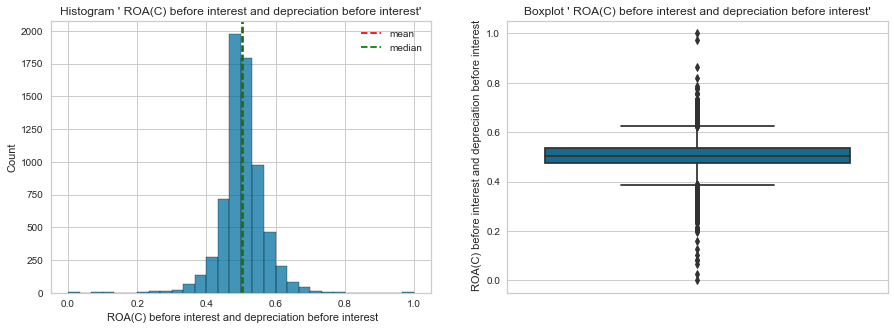

 ROA(C) before interest and depreciation before interest Kurtosis: 6.40595191845822
 ROA(C) before interest and depreciation before interest Skewness: -0.3242026732557319
Columns ' ROA(C) before interest and depreciation before interest' normal distribution


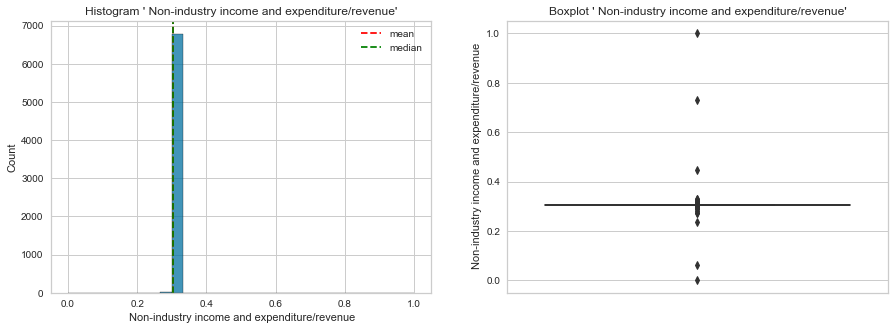

 Non-industry income and expenditure/revenue Kurtosis: 2645.5416961357337
 Non-industry income and expenditure/revenue Skewness: 39.61259885742248
Columns ' Non-industry income and expenditure/revenue' right skewed


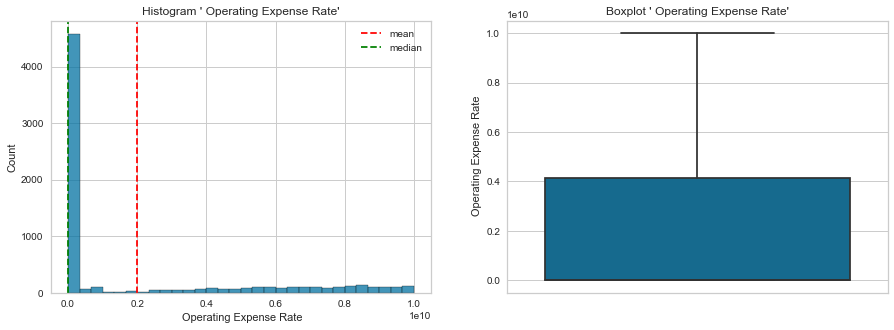

 Operating Expense Rate Kurtosis: -0.08241686650290614
 Operating Expense Rate Skewness: 1.2484343985191222
Columns ' Operating Expense Rate' right skewed


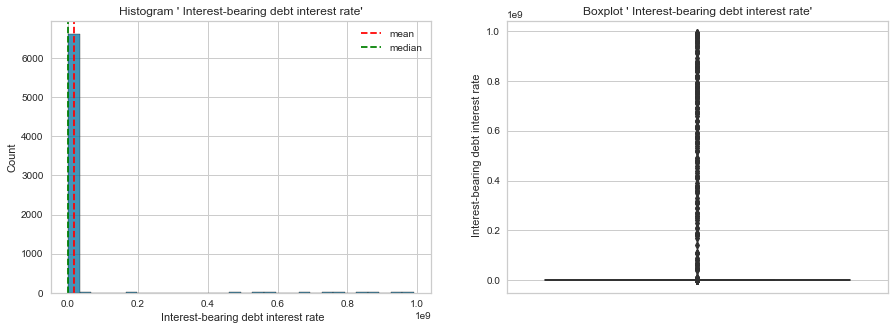

 Interest-bearing debt interest rate Kurtosis: 49.969054161258185
 Interest-bearing debt interest rate Skewness: 7.027913447867292
Columns ' Interest-bearing debt interest rate' right skewed


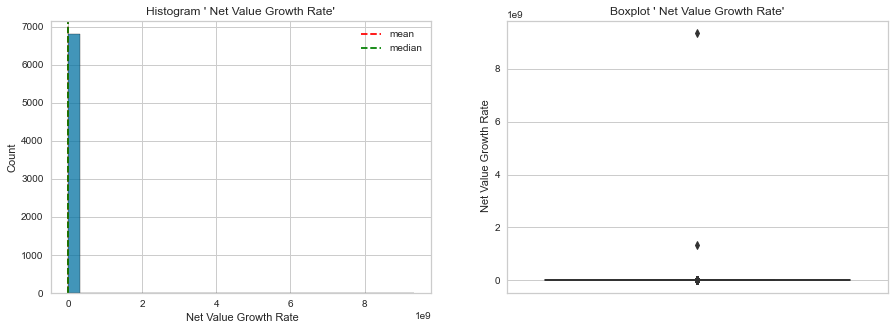

 Net Value Growth Rate Kurtosis: 6535.317122264779
 Net Value Growth Rate Skewness: 80.23294775945124
Columns ' Net Value Growth Rate' right skewed


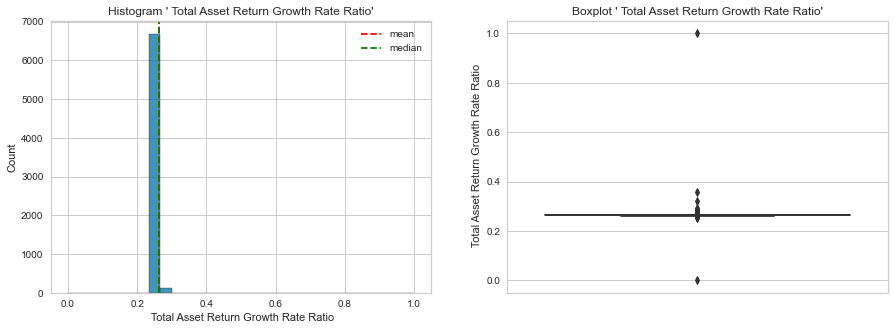

 Total Asset Return Growth Rate Ratio Kurtosis: 5067.555220606582
 Total Asset Return Growth Rate Ratio Skewness: 62.45446837082084
Columns ' Total Asset Return Growth Rate Ratio' right skewed


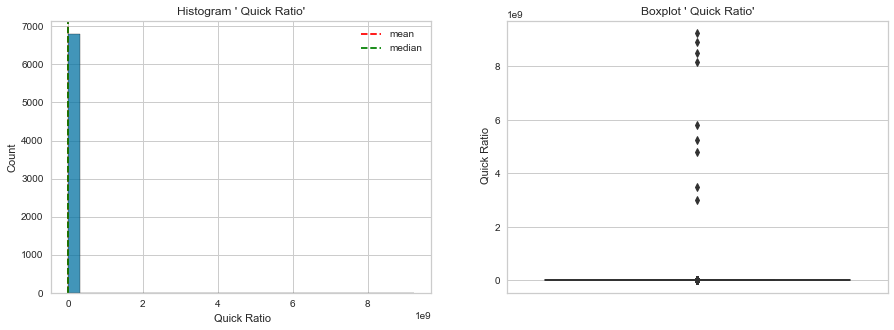

 Quick Ratio Kurtosis: 1050.1749745777
 Quick Ratio Skewness: 31.621642182047097
Columns ' Quick Ratio' right skewed


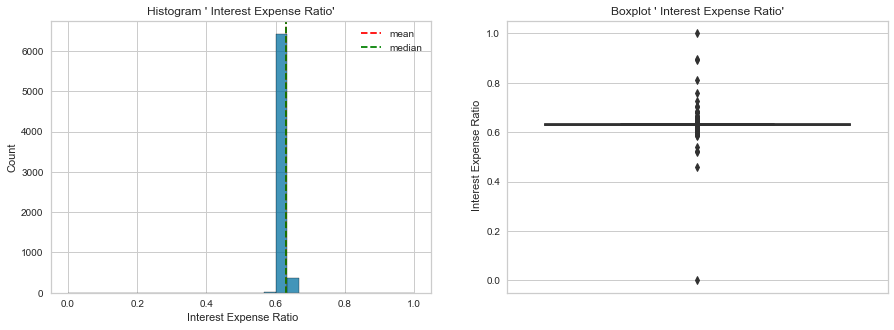

 Interest Expense Ratio Kurtosis: 1738.8437939000123
 Interest Expense Ratio Skewness: -16.811048921094553
Columns ' Interest Expense Ratio' left skewed


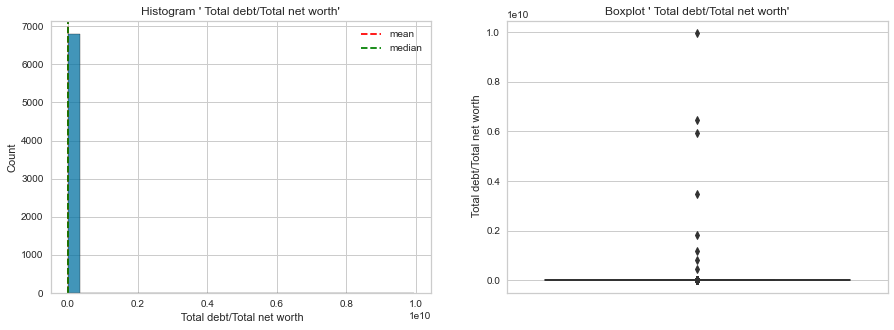

 Total debt/Total net worth Kurtosis: 2344.7923637345416
 Total debt/Total net worth Skewness: 46.32130323310616
Columns ' Total debt/Total net worth' right skewed


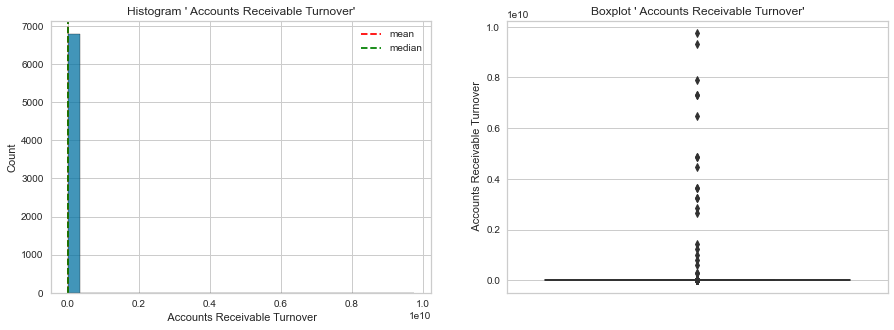

 Accounts Receivable Turnover Kurtosis: 729.8102834412229
 Accounts Receivable Turnover Skewness: 25.827514025235175
Columns ' Accounts Receivable Turnover' right skewed


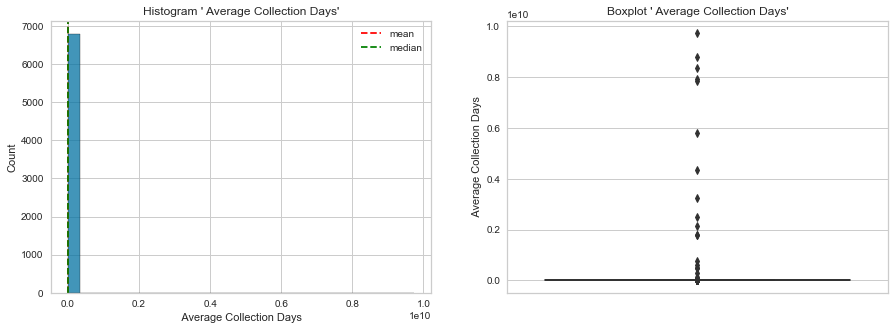

 Average Collection Days Kurtosis: 988.2780704070613
 Average Collection Days Skewness: 30.5575953690889
Columns ' Average Collection Days' right skewed


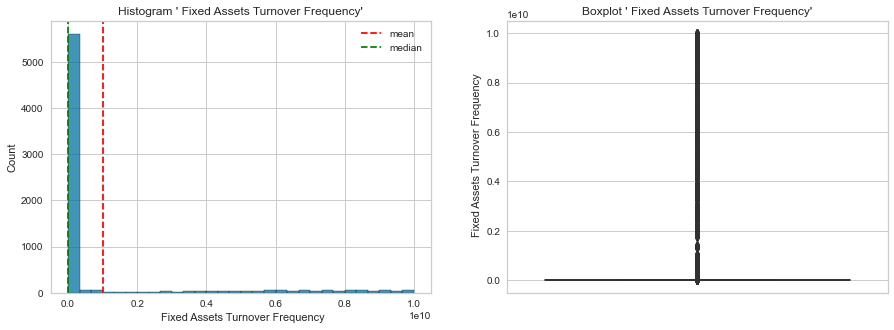

 Fixed Assets Turnover Frequency Kurtosis: 4.098744387910347
 Fixed Assets Turnover Frequency Skewness: 2.3512838402360856
Columns ' Fixed Assets Turnover Frequency' right skewed


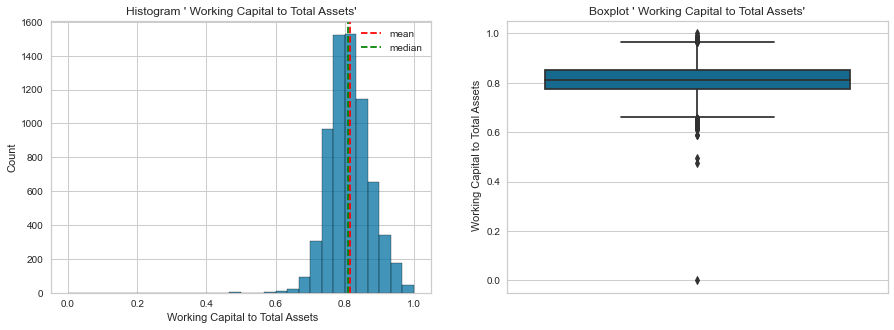

 Working Capital to Total Assets Kurtosis: 5.521110264818288
 Working Capital to Total Assets Skewness: -0.19336367581051575
Columns ' Working Capital to Total Assets' normal distribution


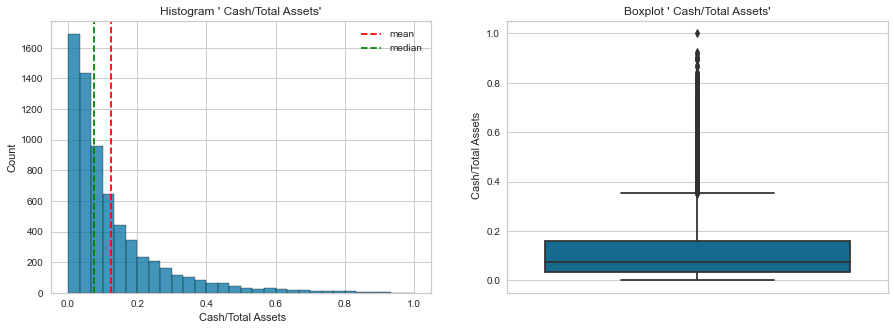

 Cash/Total Assets Kurtosis: 5.899486881473573
 Cash/Total Assets Skewness: 2.2288642409071096
Columns ' Cash/Total Assets' right skewed


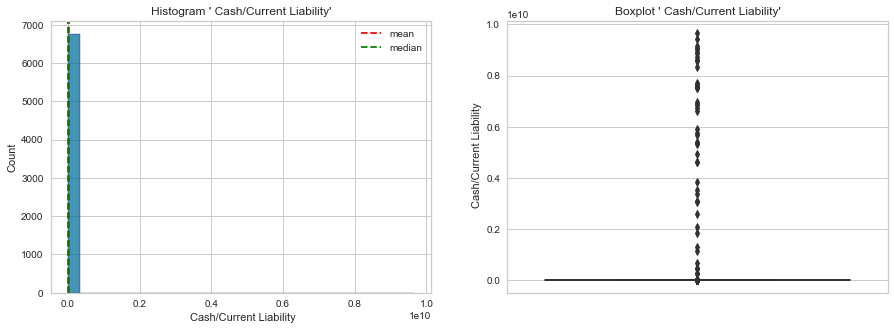

 Cash/Current Liability Kurtosis: 229.05365215292258
 Cash/Current Liability Skewness: 14.852723079015778
Columns ' Cash/Current Liability' right skewed


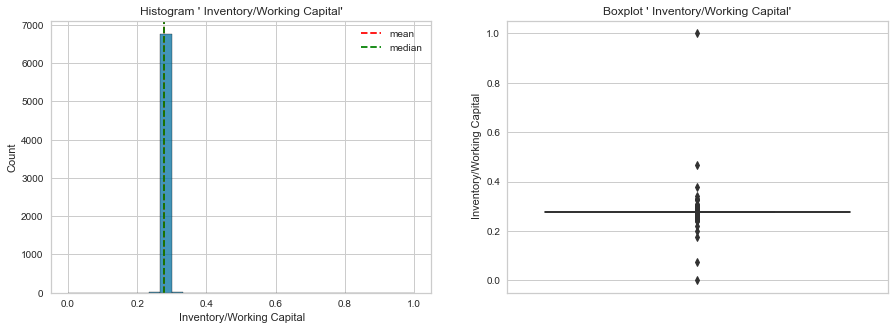

 Inventory/Working Capital Kurtosis: 3436.468222683944
 Inventory/Working Capital Skewness: 45.29940084012676
Columns ' Inventory/Working Capital' right skewed


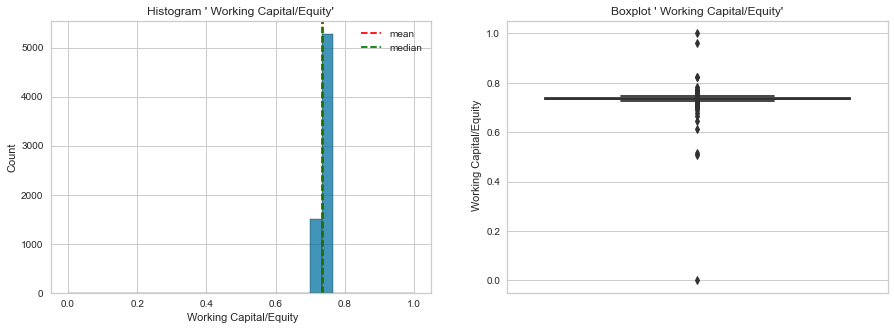

 Working Capital/Equity Kurtosis: 2410.1983600896265
 Working Capital/Equity Skewness: -36.18643857729106
Columns ' Working Capital/Equity' left skewed


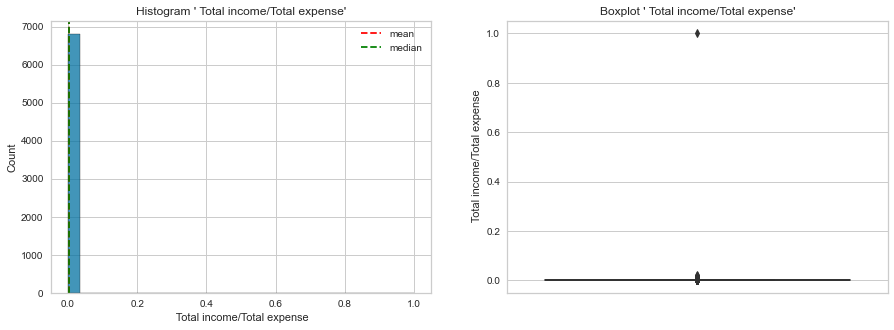

 Total income/Total expense Kurtosis: 6781.933814107832
 Total income/Total expense Skewness: 82.27212771484454
Columns ' Total income/Total expense' right skewed


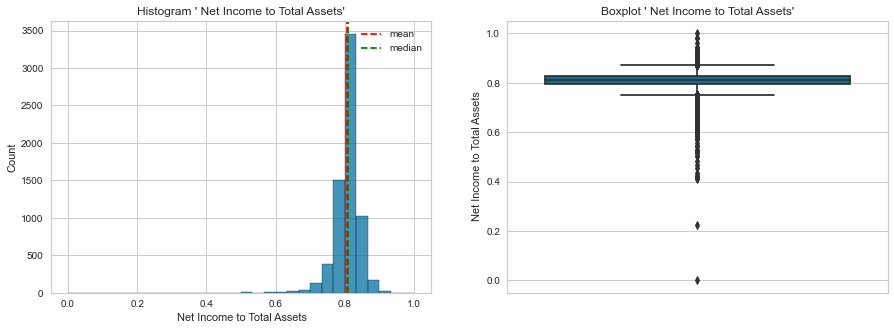

 Net Income to Total Assets Kurtosis: 43.84472739654889
 Net Income to Total Assets Skewness: -3.690735272788492
Columns ' Net Income to Total Assets' left skewed


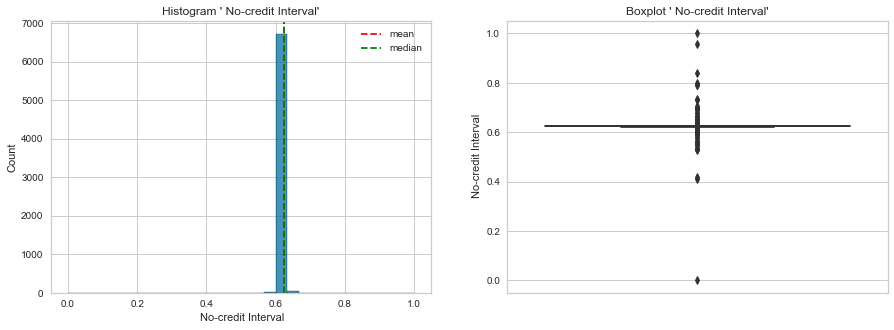

 No-credit Interval Kurtosis: 1238.949828575059
 No-credit Interval Skewness: -11.578589003252862
Columns ' No-credit Interval' left skewed


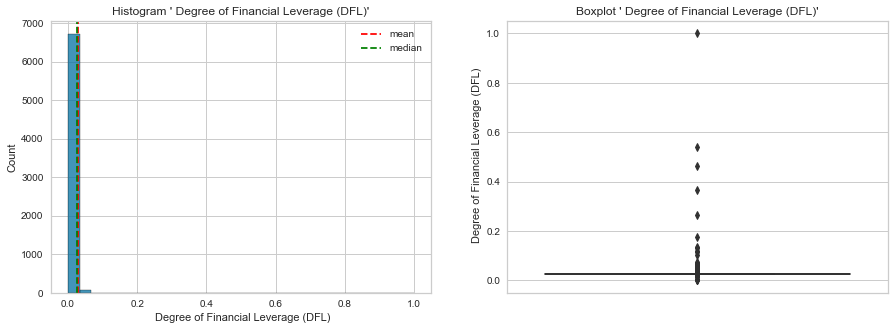

 Degree of Financial Leverage (DFL) Kurtosis: 2471.812998321421
 Degree of Financial Leverage (DFL) Skewness: 45.69080759750491
Columns ' Degree of Financial Leverage (DFL)' right skewed


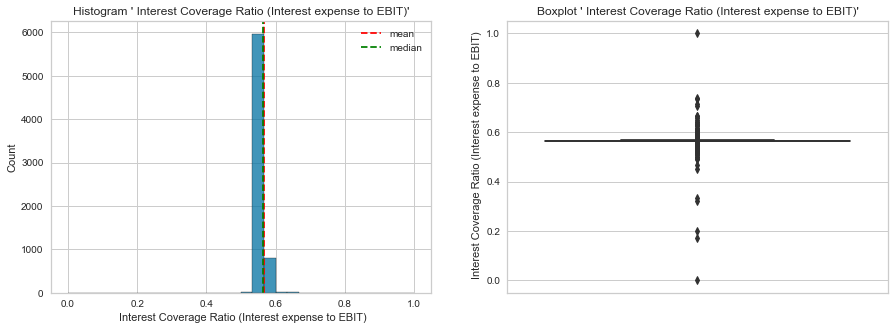

 Interest Coverage Ratio (Interest expense to EBIT) Kurtosis: 910.6027041052068
 Interest Coverage Ratio (Interest expense to EBIT) Skewness: -13.93104030458848
Columns ' Interest Coverage Ratio (Interest expense to EBIT)' left skewed


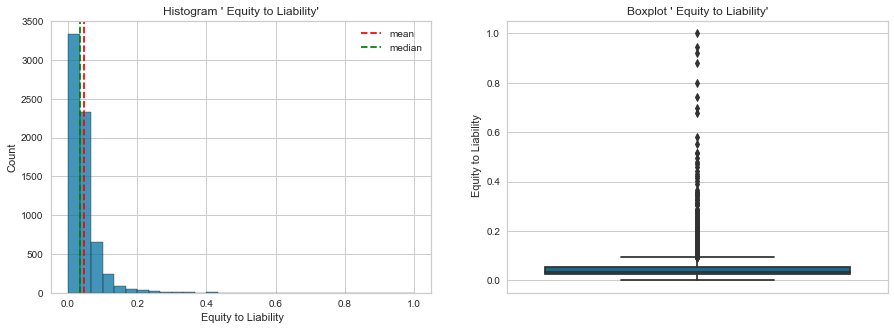

 Equity to Liability Kurtosis: 93.96964988625068
 Equity to Liability Skewness: 7.39796406250667
Columns ' Equity to Liability' right skewed


In [221]:
for col in df2.columns:
    plot_dist(df2,col)

In [224]:
X = df2
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

In [225]:
norm = 0
nonorm = 0
for col in df2.columns:
  if df2[col].skew() >=-0.5 and df2[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [226]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Definition

In [ ]:
log_model = LogisticRegression()
svc_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(), algorithm="SAMME.R",random_state=19)
gb_model = GradientBoostingClassifier()